<a href="https://colab.research.google.com/github/hasanm08/ai-notebooks/blob/main/softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


##Pre Proccessing

In [ ]:
#download dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data 'iris.data'

--2021-12-09 07:20:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-12-09 07:20:14 (93.4 MB/s) - ‘iris.data’ saved [4551/4551]

--2021-12-09 07:20:14--  http://iris.data/
Resolving iris.data (iris.data)... failed: Name or service not known.
wget: unable to resolve host address ‘iris.data’
FINISHED --2021-12-09 07:20:14--
Total wall clock time: 0.2s
Downloaded: 1 files, 4.4K in 0s (93.4 MB/s)


In [ ]:

irisdf = pd.read_csv('/content/iris.data' , delimiter=',' )
irisdf = irisdf.sample(frac = 1)#shuffle df
irisdf

,5.1,3.5,1.4,0.2,Iris-setosa
26,5.2,3.5,1.5,0.2,Iris-setosa
88,5.5,2.5,4.0,1.3,Iris-versicolor
34,5.0,3.2,1.2,0.2,Iris-setosa
147,6.2,3.4,5.4,2.3,Iris-virginica
138,6.9,3.1,5.4,2.1,Iris-virginica
...,...,...,...,...,...
53,6.5,2.8,4.6,1.5,Iris-versicolor
129,7.4,2.8,6.1,1.9,Iris-virginica
77,6.0,2.9,4.5,1.5,Iris-versicolor
87,5.6,3.0,4.1,1.3,Iris-versicolor


In [ ]:
def parse_label(title):
  if title=="Iris-setosa":
    return 0
  elif title=="Iris-versicolor":
    return 1
  else:
    return 2

##Softmax
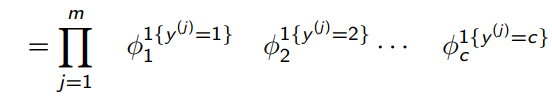

In [ ]:
X_train=np.array(irisdf.iloc[: , :-1])[int(len(iris)*0.8):]
Y_train=np.array(irisdf.iloc[: , -1])[int(len(iris)*0.8):]
Y_train=[parse_label(item) for item in Y_train]

X_test=np.array(irisdf.iloc[: , :-1])[:int(len(iris)*0.2)]
Y_test=np.array(irisdf.iloc[: , -1])[:int(len(iris)*0.2)]
Y_test=[parse_label(item) for item in Y_test]

In [ ]:
def one_hot(y, c):
    
    # y--> label.
    # c--> Number of classes.
    
    y_hot = np.zeros((len(y), c))
    # Putting 1 for column where the label is,
    # Using multidimensional indexing.
    #note: np.arrange(4)= [1,2,3]
    y_hot[np.arange(len(y)), y] = 1
    
    return y_hot

In [ ]:
def softmax(z):
    
    # z--> linear part.
    
    # subtracting the max of z for numerical stability.
    exp = np.exp(z - np.max(z))
    
    # Calculating softmax for all examples.
    for i in range(len(z)):
        exp[i] =exp[i] / np.sum(exp[i])
        
    return exp

In [ ]:
def fit(X, y, lr, c, epsilon):
    m, n = X.shape
    w = np.random.random((n, c))
    b = np.random.random(c)
    loss_list = []
    epoch=0
    flag=True
    while flag:
        z = np.dot(X,w) + b
        y_hat = softmax(z)
        y_hot = one_hot(y, c)
        #Gradient
        w_grad = (1/m)*np.dot(X.T, (y_hat - y_hot)) 
        b_grad = (1/m)*np.sum(y_hat - y_hot)
        #Update
        w = w - lr*w_grad
        b = b - lr*b_grad 
        loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
        flag=  loss>epsilon
        loss_list.append(loss)
        
        print('Epoch {epoch}==> Loss = {loss}'
              .format(epoch=epoch, loss=loss))
        epoch=epoch+1
    return w, b, loss_list

In [ ]:
def predict(X, w, b):
    z = np.dot(X,w) + b
    y_hat = softmax(z)
    
    # Returning the class with highest probability.
    return np.argmax(y_hat, axis=1)

In [ ]:
def accuracy(y, y_hat):
    return np.sum(y==y_hat)/len(y) #TP+TN/TP+TN+FP+FN

In [ ]:
w, b, l = fit(X_train, Y_train, lr=0.7, c=3, epsilon=0.07)
# Accuracy for training set.
train_pred = predict(X_train, w, b)
print(accuracy(Y_train, train_pred))
# Accuracy for test set.
test_pred = predict(X_test, w, b)
print(accuracy(Y_test, test_pred))